# Chapter 2: Drawing with 2D Vectors

## 2.1 Picturing 2D Vectors

In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

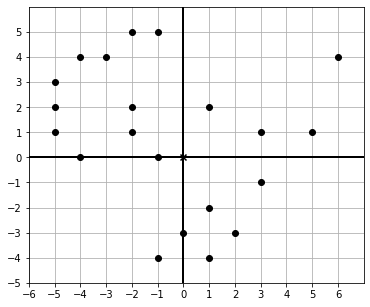

In [2]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors)
)

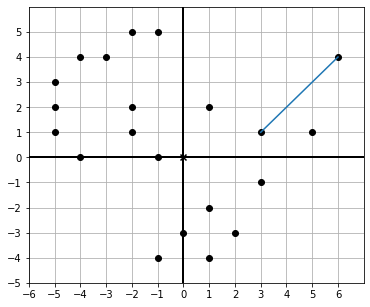

In [3]:
draw(
    Points(*dino_vectors),
    Segment((6,4),(3,1))
)

**EXERCISE:** Draw the dinosaur with the dots connected by constructing a `Polygon` object with the `dino_vectors` as its vertices.

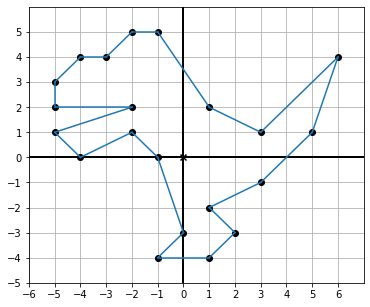

In [4]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

**EXERCISE** Draw the vectors `[(x,x**2) for x in range(-10,11)]` as points (dots) using the draw function.  What is the result?

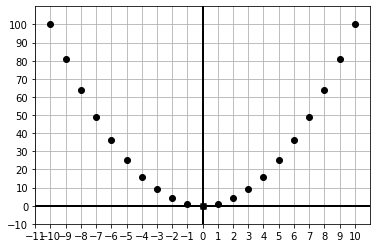

In [5]:
draw(
    Points(*[(x,x**2) for x in range(-10,11)]),
    grid=(1,10),
    nice_aspect_ratio=False # don't require x scale to match y scale
)

# Plane Vector Arithmetic

In [7]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [8]:
dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

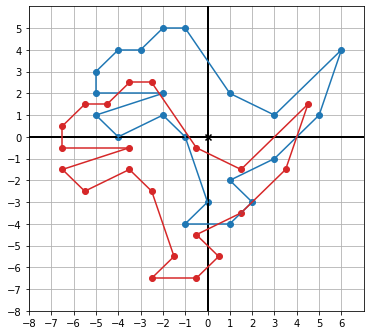

In [9]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

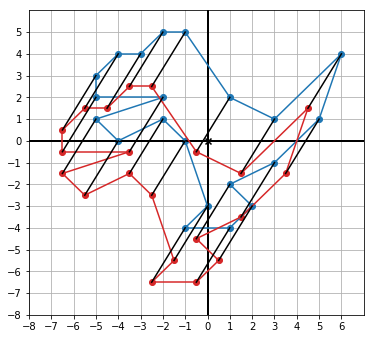

In [9]:
arrows = [Segment(tip,tail,color=black) for (tip,tail) in
         zip(dino_vectors2, dino_vectors)]
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows
)

## Vector components and lengths

In [10]:
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2) 

## Subtraction, displacement, and distance

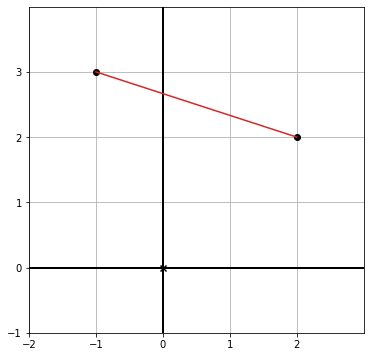

In [11]:
draw(
.    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

**MINI-PROJECT:** You can add any number of vectors together by summing all of their $x$-coordinates and all of their $y$-coordinates.  For instance the four-fold sum (1,2) + (2,4) + (3,6) + (4,8) has $x$-component 1 + 2 + 3 + 4 = 10 and $y$-component 2 + 4 + 6 + 8 = 20, making the result (10,20).  Implement a revised add function that takes any number of vectors as arguments.

In [12]:
def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

**EXERCISE:** Write a function translate(translation, vectors) that takes in a translation vector and a list of input vectors and returns a list of the input vectors all translated by the translation vector. For instance, `translate((1,1), [(0,0), (0,1,), (-3,-3)])` should return `[(1,1),(1,2),(-2,-2)]`.

In [13]:
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

translate((1,1), [(0,0), (0,1,), (-3,-3)])

[(1, 1), (1, 2), (-2, -2)]

**MINI-PROJECT:** Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur.  This shows the power of computer graphics: imagine how tedious it would be to specify all 2,100 coordinate pairs by hand!

In [14]:
def hundred_dinos():
    translations = [(12*x,10*y) 
                    for x in range(-5,5) 
                    for y in range(-5,5)]
    dinos = [Polygon(*translate(t, dino_vectors),color=blue)
                for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)

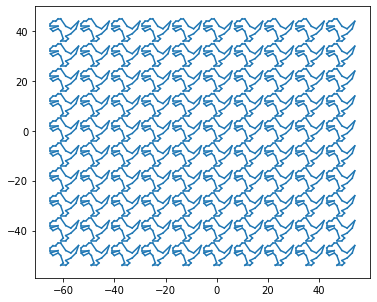

In [15]:
hundred_dinos()                                 

**EXERCISE:** What vector in the dino_vectors list has the longest length?  Use the Python length function to compute the answer quickly.

In [16]:
>>> max(dino_vectors, key=length)
(6, 4)

(6, 4)

**EXERCISE:** Suppose a vector $\vec{w}$ has coordinates $(2 ,3)$.  What are the approximate coordinates of the scalar multiple $\pi \cdot \vec{w}$?  Draw an approximation of the original vector and the new vector.

In [17]:
from math import sqrt, pi

w = (sqrt(2),sqrt(3))
w_scaled = (pi * sqrt(2), pi * sqrt(3))

In [18]:
w_scaled

(4.442882938158366, 5.441398092702653)

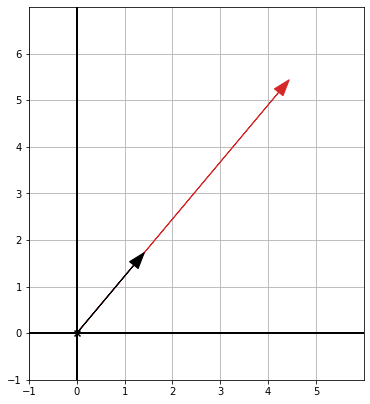

In [19]:
draw(
    Arrow(w_scaled, color=red),
    Arrow(w, color=black)
)

**EXERCISE:** Write a python function `scale(s, v)` that multiplies the input vector `v` by the input scalar `s`.

In [20]:
def scale(scalar,v):
    return (scalar * v[0], scalar * v[1])

**MINI-PROJECT:** Suppose $\vec{u} = (-1,1)$ and $\vec{v} = (1,1)$ and suppose $r$ and $s$ are real numbers.  Specifically, let’s assume $-1 < r < 1$ and $-3 < s < 3$.  

Where are the possible points on the plane where the vector $r \cdot \vec{u} + s \cdot \vec{v}$ could end up?  

Note: the order of operations is the same for vectors as it is for numbers: we assume scalar multiplication is carried out first, and then vector addition (unless parentheses specify otherwise).

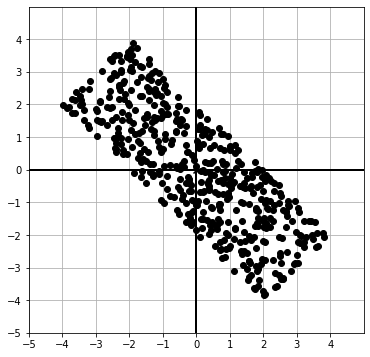

In [21]:
from random import uniform
u = (-1,1)
v = (1,1)
def random_r():
    return uniform(-3,3)
def random_s(): 
    return uniform(-1,1)
possibilities = [add(scale(random_r(), u), scale(random_s(), v)) 
                 for i in range(0,500)]
draw(
    Points(*possibilities)
)

**EXERCISE:** Write a Python function `subtract(v1,v2)` that returns the result of `v1` minus `v2`, where the inputs and output are tuples of coordinates as we’ve seen so far.

In [22]:
def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

**EXERCISE:** Write a Python function `distance(v1,v2)` that returns the distance between two input vectors (noting that the subtract function from the previous exercise already gives the displacement).  

Write another Python function `perimeter(vectors)` that takes a list of vectors as an argument and returns the sum of distances from each vector to the next, including the distance from the last vector to the first.  What is the perimeter of the polygon defined by `dino_vectors`?

In [23]:
def distance(v1,v2):
    return length(subtract(v1,v2))

In [24]:
def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)])
                    for i in range(0,len(vectors))]
    return sum(distances)

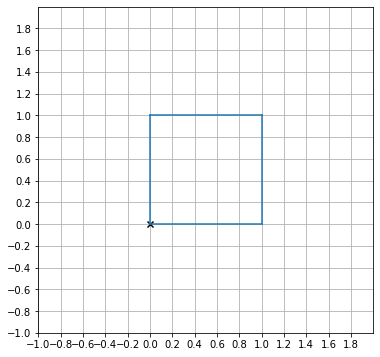

In [25]:
# sanity check with a square
square = [(1,0),(1,1),(0,1),(0,0)]
draw(Polygon(*square), grid=(0.2,0.2), axes=None)

In [26]:
# should be 1+1+1+1=4
perimeter(square)

4.0

In [27]:
perimeter(dino_vectors)

44.77115093694563

**MINI-PROJECT:** Let $\vec{u}$ be the vector $(1,2)$.  Suppose there is another vector, $\vec{v}$, with positive integer coordinates $(n, m)$ such that $n > m$, and having distance $13$ from $\vec{u}$.  What is the displacement from $\vec{u}$ to $\vec{v}$?  Hint: you can use Python to search for the vector $\vec{v}$.

**SOLUTION:** We only need to search possible integer pairs (n,m) where n is within 13 units of 1 and m is within 13 units of -1.

In [28]:
for n in range(-12,15):
    for m in range(-14, 13):
        if distance((n,m), (1,-1)) == 13 and n > m > 0:
            print((n,m))

(13, 4)


# Angles and trigonometry in the plane

## Radians and trigonometry in python

In [29]:
from math import tan
tan(45) # tangent of 45 radians, not degrees

1.6197751905438615

In [30]:
from math import tan, pi
tan(pi/4) # now this is the tangent of pi/4 radians = 45 degrees 

0.9999999999999999

In [31]:
from math import sin, cos
def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))

In [32]:
# Verify that 5 units @ 37 degrees takes us to (4,3)
angle = 37*pi/180
to_cartesian((5,angle))

(3.993177550236464, 3.0090751157602416)

In [33]:
from math import asin
sin(1)

0.8414709848078965

In [34]:
asin(0.8414709848078965)

1.0

In [34]:
# trying to find an angle with sin = 3/sqrt(13)
from math import sqrt
asin(3/sqrt(13))

0.9827937232473292

In [36]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

In [35]:
cos(2.1587989303424644)

-0.5547001962252293

In [38]:
-2/sqrt(13)

-0.5547001962252291

In [36]:
sin(2.1587989303424644)

0.8320502943378436

In [37]:
3/sqrt(13)

0.8320502943378437

In [38]:
from math import atan2
atan2(3,-2)

2.158798930342464

In [39]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

In [40]:
to_polar((1,0))

(1.0, 0.0)

In [41]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

**EXERCISE:** Confirm that the vector given by cartesian coordinates (-1.34,2.68) has length approximately 3, as expected.

In [42]:
length((-1.34,2.68))

2.9963310898497184

**EXERCISE:** What is $116.57^\circ$ in radians?  Use Python to compute the tangent of this angle, and confirm that it is close to $-2$ as we saw above.

**SOLUTION:** $116.57^\circ · (1 \text{rad} / 57.296^\circ) = 2.035 \text{rad}.$

In [43]:
tan(2.035)

-1.9972227673316139

**EXERCISE:** Locate the angle $10\pi/6$.  Do you expect the values of $\cos(10\pi/6)$ and $\sin(10\pi/6)$ to be positive or negative?  Use Python to calculate their values and confirm.

**SOLUTION:** The angle $\pi/6$ is one third of a quarter-turn, so $10\pi/6$ is less than a quarter turn short of a full rotation.  This means that it points "down and to the right".  The cosine should be positive and the sine should be negative, since distance in this direction corresponds with positive horizontal displacement and negative vertical displacement.

In [44]:
sin(10*pi/6)

-0.8660254037844386

In [45]:
cos(10*pi/6)

0.5000000000000001

**EXERCISE:** The following list comprehension creates 1000 points in polar coordinates.  

In [46]:
polar_coords = [(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]

In Python code, convert them to cartesian coordinates, and connect them in a closed loop with line segments to draw a picture.

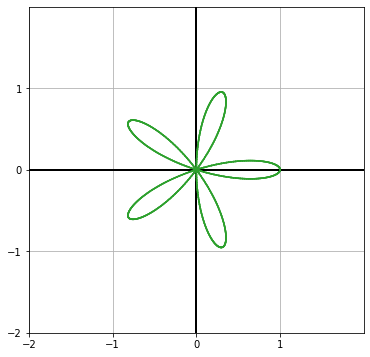

In [47]:
polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(p) for p in polar_coords]
draw(Polygon(*vectors, color=green))

**EXERCISE:** Find the angle to get to the point (-2,3) by “guess-and-check”.  

In [48]:
# we want to make guesses between pi/2 and pi
pi, pi/2

(3.141592653589793, 1.5707963267948966)

In [49]:
tan(1.8)

-4.286261674628062

In [50]:
tan(2.5)

-0.7470222972386603

In [51]:
tan(2.2)

-1.3738230567687946

In [52]:
tan(2.1)

-1.7098465429045073

In [53]:
tan(2.15)

-1.5289797578045665

In [54]:
tan(2.16)

-1.496103541616277

In [55]:
tan(2.155)

-1.5124173422757465

In [56]:
tan(2.156)

-1.5091348993879299

In [57]:
tan(2.157)

-1.5058623488727219

In [58]:
tan(2.158)

-1.5025996395625054

In [59]:
# we conclude the angle is between 2.158 and 2.159.
tan(2.159)

-1.4993467206361923

**EXERCISE:**  Find another point in the plane with the same tangent as $\theta$, that is $-3/2$.  Use Python’s implementation of the arctangent function, `math.atan`, to find the value of this angle.

In [60]:
from math import atan

In [61]:
atan(-3/2)

-0.982793723247329

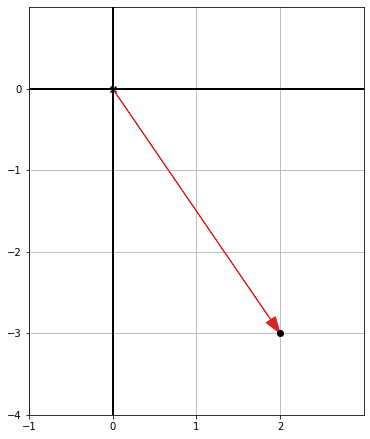

In [62]:
# this is the direction to the point (2,-3).  
# tan(-3/2) = tan(-1.5) = tan(3/-2)
draw(Arrow((2,-3)), Points((2,-3)))

**EXERCISE:** Without using Python, what are polar coordinates corresponding to the cartesian coordinates $(1,1)$ and $(1,-1)$?  Once you’ve found the answers, use to_polar to check your work.

**SOLUTION:** The answers should be $(\sqrt{2},\pi/4)$ and $(\sqrt{2},-\pi/4)$.

In [63]:
to_polar((1,1))

(1.4142135623730951, 0.7853981633974483)

In [64]:
to_polar((1,-1))

(1.4142135623730951, -0.7853981633974483)

In [65]:
#compare to
(sqrt(2), pi/4)

(1.4142135623730951, 0.7853981633974483)

In [66]:
(sqrt(2), -pi/4)

(1.4142135623730951, -0.7853981633974483)

# Transforming collections of vectors

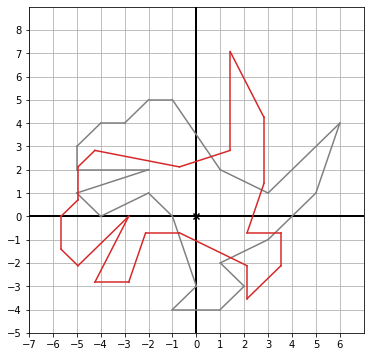

In [67]:
rotation_angle = pi/4

dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

**EXERCISE:** Create a `rotate(angle, vectors)` function which takes an array of input vectors in cartesian coordinates and returns them by the specified angle (counterclockwise or clockwise according to whether the angle is positive or negative). 

In [68]:
def rotate(angle, vectors):
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l, a+angle)) for l,a in polars]

## Combining vector transformations

In [69]:
new_dino = translate((8,8), rotate(5 * pi/3, dino_vectors))

**EXERCISE:** Create a function `polygon(n)` which returns cartesian coordinates of a regular $n$-sided polygon (that is, having all angles and side lengths equal).  For instance, `polygon(7)` could produce vectors defining a heptagon.

In [70]:
def regular_polygon(n):
    return [to_cartesian((1, 2*pi*k/n)) for k in range(0,n)]

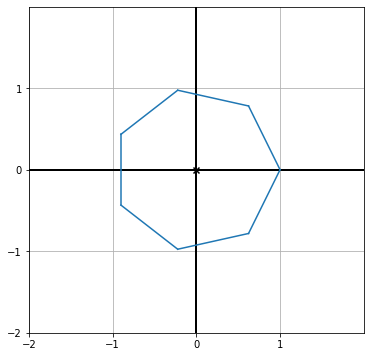

In [71]:
draw(
    Polygon(*regular_polygon(7))
)